Business Understanding


Data Understanding

Data Preparation

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import wordcloud 
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
pd.set_option('display.float_format', lambda x: '%.9f' % x)

In [2]:
# Loading the datasets into DataFrames

stores = pd.read_csv("stores.csv")
train = pd.read_csv("train.csv")
tests = pd.read_csv("test.csv")
transactions = pd.read_csv("transactions.csv")
holidays = pd.read_csv("holidays_events.csv")
oil = pd.read_csv("oil.csv")

# Exploring the various dataset

In [3]:
#Exploring the various dataset
#stores.info()
train.info()
#tests.info()
#transactions.info()
train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB


,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [4]:
#Exploring the various dataset
tests.info()
tests.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           28512 non-null  int64 
 1   date         28512 non-null  object
 2   store_nbr    28512 non-null  int64 
 3   family       28512 non-null  object
 4   onpromotion  28512 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.1+ MB


,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0


**The train and test data have similar columns except the sales column which is not in the test data.**

In [5]:
#Checking for missing values
#missing_values = tests.isnull().sum().sort_values(ascending =True)
#missing_values
missing_values1 = train.isnull().sum().sort_values(ascending =True)
missing_values1

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

**Both train and test data have no missing values.
Let's explore the other datasets


In [6]:
#Exploring the various dataset
stores.info()
#transactions.info()
#holidays.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   store_nbr  54 non-null     int64 
 1   city       54 non-null     object
 2   state      54 non-null     object
 3   type       54 non-null     object
 4   cluster    54 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.2+ KB


**The transaction and stores datasets have columns common to both test and train datasets. These columns can be used as a linking attribute (PK/FK) to merge the datasets on.**

In [7]:
#merging the datasets
df_train = train.merge(transactions, on = ['date', 'store_nbr'], how='left')
df_train = df_train.merge(stores, on = 'store_nbr', how='left')
#df_train1 = df_train1.merge(oil, on = 'date', how='left')
#df_train1 = train.merge(holidays, on = 'date', how='left')
#df_train1 = df_train1.rename(columns = {"type_x" : "holiday_type", "type_y" : "store_type"})
#transactions.info()
df_train.info()
df_train.head()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000888 entries, 0 to 3000887
Data columns (total 11 columns):
 #   Column        Dtype  
---  ------        -----  
 0   id            int64  
 1   date          object 
 2   store_nbr     int64  
 3   family        object 
 4   sales         float64
 5   onpromotion   int64  
 6   transactions  float64
 7   city          object 
 8   state         object 
 9   type          object 
 10  cluster       int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 274.7+ MB


,id,date,store_nbr,family,sales,onpromotion,transactions,city,state,type,cluster
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,NaN,Quito,Pichincha,D,13
1,1,2013-01-01,1,BABY CARE,0.0,0,NaN,Quito,Pichincha,D,13
2,2,2013-01-01,1,BEAUTY,0.0,0,NaN,Quito,Pichincha,D,13
3,3,2013-01-01,1,BEVERAGES,0.0,0,NaN,Quito,Pichincha,D,13
4,4,2013-01-01,1,BOOKS,0.0,0,NaN,Quito,Pichincha,D,13


** Since we will Analysis of data set by Year, Month and Day, we will disaggregate the date column into Year, Month and Day columns so we can aggregate the data by those parameters**

In [48]:
#Breaking the year column into day, month, year, day of the week, and week.
df_train['date'] = pd.to_datetime(train['date'])
df_train['year'] = df_train['date'].dt.year
df_train['month'] = df_train['date'].dt.month
df_train['week'] = df_train['date'].dt.isocalendar().week
df_train['quarter'] = df_train['date'].dt.quarter
df_train['day_of_week'] = df_train['date'].dt.day_name()
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 16 columns):
 #   Column        Dtype         
---  ------        -----         
 0   id            int64         
 1   date          datetime64[ns]
 2   store_nbr     int64         
 3   family        object        
 4   sales         float64       
 5   onpromotion   int64         
 6   transactions  float64       
 7   city          object        
 8   state         object        
 9   type          object        
 10  cluster       int64         
 11  year          int64         
 12  month         int64         
 13  week          UInt32        
 14  quarter       int64         
 15  day_of_week   object        
dtypes: UInt32(1), datetime64[ns](1), float64(2), int64(7), object(5)
memory usage: 357.7+ MB


In [9]:
missing_values = df_train.isnull().sum().sort_values(ascending =True)
missing_values

id                   0
date                 0
store_nbr            0
family               0
sales                0
onpromotion          0
city                 0
state                0
type                 0
cluster              0
year                 0
month                0
week                 0
quarter              0
day_of_week          0
transactions    245784
dtype: int64

**The transactions data is missing 245784 values** Since the column contains the count of sales transactions for each date, store_nbr combination, we have ti fill the missing data as it is important for our analysis. 
**We will be using the back fill method because the rows have repeating values. 

In [10]:
#Filling the missing data using the Backfill method
df_train["transactions"].fillna(method='bfill', inplace=True)
df_train

,id,date,store_nbr,family,sales,onpromotion,transactions,city,state,type,cluster,year,month,week,quarter,day_of_week
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,770.0,Quito,Pichincha,D,13,2013,1,1,1,Tuesday
1,1,2013-01-01,1,BABY CARE,0.000,0,770.0,Quito,Pichincha,D,13,2013,1,1,1,Tuesday
2,2,2013-01-01,1,BEAUTY,0.000,0,770.0,Quito,Pichincha,D,13,2013,1,1,1,Tuesday
3,3,2013-01-01,1,BEVERAGES,0.000,0,770.0,Quito,Pichincha,D,13,2013,1,1,1,Tuesday
4,4,2013-01-01,1,BOOKS,0.000,0,770.0,Quito,Pichincha,D,13,2013,1,1,1,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0,2155.0,Quito,Pichincha,B,6,2017,8,33,3,Tuesday
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,2155.0,Quito,Pichincha,B,6,2017,8,33,3,Tuesday
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148,2155.0,Quito,Pichincha,B,6,2017,8,33,3,Tuesday
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,2155.0,Quito,Pichincha,B,6,2017,8,33,3,Tuesday


In [11]:
#reseting dataframe index 
df_train.reset_index(drop=True, inplace=True)

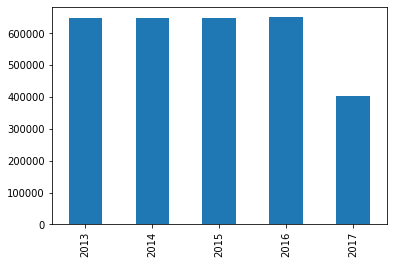

2013    648648
2014    648648
2015    648648
2016    650430
2017    404514
Name: year, dtype: int64

In [14]:
#volume of transaction/ number of transactions by year
sales_count = df_train["year"].value_counts(sort=False)
sales_count.plot.bar()
plt.show()
sales_count

<AxesSubplot:xlabel='year'>

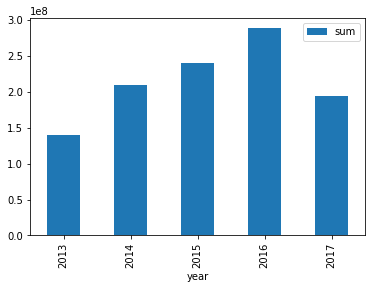

In [15]:
total_sales = df_train.groupby(['year'])['sales'].agg(["sum"])
total_sales1 = total_sales.sort_index()
total_sales1.plot.bar()
#(x=total_investment.index, y=total_investment.values, 
                        #  ylabel= 'Funding Amount in Dollars',xlabel='Funding Year')


<AxesSubplot:xlabel='month'>

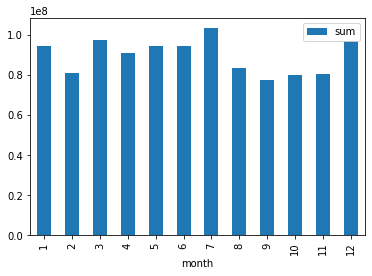

In [16]:

total_sales_bydate = df_train.groupby(['month'])['sales'].agg(["sum"])
#total_sales2 = total_sales2.sort_index()
total_sales_bydate.plot.bar()
#(x=total_investment.index, y=total_investment.values, 
                        #  ylabel= 'Funding Amount in Dollars',xlabel='Funding Year')


<AxesSubplot:xlabel='day_of_week'>

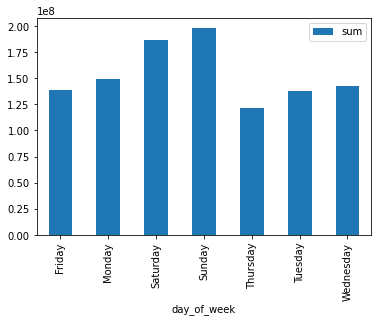

In [17]:

total_sales_byday = df_train.groupby(['day_of_week'])['sales'].agg(["sum"])
#total_sales_byday = df_train.groupby(['sales'])['day_of_week'].agg(["sum"])
total_sales_byday = total_sales_byday.sort_index(axis =0)
total_sales_byday.plot.bar()
#(x=total_investment.index, y=total_investment.values, 
                        #  ylabel= 'Funding Amount in Dollars',xlabel='Funding Year')


,sum
city,
Ambato,4.030440e+07
Babahoyo,1.774687e+07
Cayambe,2.832556e+07
Cuenca,4.916860e+07
Daule,1.918802e+07
El Carmen,1.105748e+07
Esmeraldas,1.639169e+07
Guaranda,1.304951e+07
Guayaquil,1.229673e+08


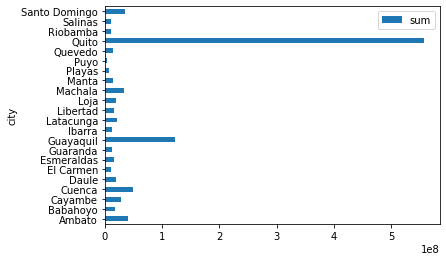

In [22]:
#Sales by city
total_sales_byday = df_train.groupby(['city'])['sales'].agg(["sum"])
#total_sales_byday = df_train.groupby(['sales'])['day_of_week'].agg(["sum"])
total_sales_byday = total_sales_byday.sort_index()
total_sales_byday.plot.barh()
#(x=total_investment.index, y=total_investment.values, 
                        #  ylabel= 'Funding Amount in Dollars',xlabel='Funding Year')
total_sales_byday

,sum
state,
Azuay,49168596.033181101
Bolivar,13049509.836733000
Chimborazo,11387918.748218000
Cotopaxi,21182263.775176000
El Oro,33386796.544552401
Esmeraldas,16391692.211909600
Guayas,165154392.381637990
Imbabura,11451270.022647999
Loja,18859999.260529600


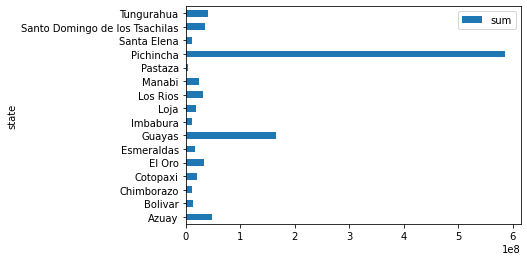

In [29]:
#Sales by state
total_sales_byday = df_train.groupby(['state'])['sales'].agg(["sum"])
#total_sales_byday = df_train.groupby(['sales'])['day_of_week'].agg(["sum"])
total_sales_byday = total_sales_byday.sort_index()
total_sales_byday.head(20).plot.barh()
#(x=total_investment.index, y=total_investment.values, 
                        #  ylabel= 'Funding Amount in Dollars',xlabel='Funding Year')
total_sales_byday

In [31]:
#volume of transaction/ number of transactions by year
sales_count = df_train.groupby(['state'])['store_nbr'].value_counts.sort_index()
#sales_count = df_train["year"].value_counts(sort=False)
sales_count.plot.line(x=sales_counts.index, y=sales_counts.values)
plt.show()
sales_count

AttributeError: 'function' object has no attribute 'sort_index'

In [ ]:
z = df_train['transactions']
z.plot()
plt.show()


In [ ]:
missing_values = df_train.isnull().sum().sort_values(ascending =True)
missing_values

In [ ]:
train.plot(x="store_nbr", y="sales")
plt.show()

In [ ]:
train.head()

In [33]:
#merging the 5 datasets
df_train1 = train.merge(transactions, on = ['date', 'store_nbr'], how='left')
df_train1 = df_train1.merge(stores, on = 'store_nbr', how='left')
df_train1 = df_train1.merge(oil, on = 'date', how='left')
df_train1 = train.merge(holidays, on = 'date', how='left')
#df_train1 = df_train1.rename(columns = {"type_x" : "holiday_type", "type_y" : "store_type"})
df_train1.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          83488 non-null  object
 1   store_nbr     83488 non-null  int64 
 2   transactions  83488 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.9+ MB


,id,date,store_nbr,family,sales,onpromotion,type,locale,locale_name,description,transferred
0,0,2013-01-01,1,AUTOMOTIVE,0.000000000,0,Holiday,National,Ecuador,Primer dia del ano,False
1,1,2013-01-01,1,BABY CARE,0.000000000,0,Holiday,National,Ecuador,Primer dia del ano,False
2,2,2013-01-01,1,BEAUTY,0.000000000,0,Holiday,National,Ecuador,Primer dia del ano,False
3,3,2013-01-01,1,BEVERAGES,0.000000000,0,Holiday,National,Ecuador,Primer dia del ano,False
4,4,2013-01-01,1,BOOKS,0.000000000,0,Holiday,National,Ecuador,Primer dia del ano,False


In [34]:
#Breaking the year column into day, month, year, day of the week, and week so we can aggregate the data by those parameters
df_train1['date'] = pd.to_datetime(df_train1['date'])
df_train1['year'] = df_train1['date'].dt.year
df_train1['month'] = df_train1['date'].dt.month
df_train1['week'] = df_train1['date'].dt.isocalendar().week
df_train1['quarter'] = df_train1['date'].dt.quarter
df_train1['day_of_week'] = df_train1['date'].dt.day_name()
df_train1[:2]

,id,date,store_nbr,family,sales,onpromotion,type,locale,locale_name,description,transferred,year,month,week,quarter,day_of_week
0,0,2013-01-01,1,AUTOMOTIVE,0.000000000,0,Holiday,National,Ecuador,Primer dia del ano,False,2013,1,1,1,Tuesday
1,1,2013-01-01,1,BABY CARE,0.000000000,0,Holiday,National,Ecuador,Primer dia del ano,False,2013,1,1,1,Tuesday


In [ ]:
a = df_train1["year"].value_counts(sort=False)
a
#plt.show()

In [ ]:
#b = df_train1["store_nbr"].unique()
b= stores["city"].value_counts(sort=False)
#b = stores["city"].unique()
b


In [35]:
missing_values = df_train1.isnull().sum().sort_values(ascending =True)
missing_values

id                   0
date                 0
store_nbr            0
family               0
sales                0
onpromotion          0
year                 0
month                0
week                 0
quarter              0
day_of_week          0
type           2551824
locale         2551824
locale_name    2551824
description    2551824
transferred    2551824
dtype: int64

In [40]:
#merging the 5 dataset
df1 = holidays.merge(train, on = 'date', how='left')
df1 = df1.merge(stores, on = 'store_nbr', how='left')
df1


,date,type_x,locale,locale_name,description,transferred,id,store_nbr,family,sales,onpromotion,city,state,type_y,cluster
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502587,2017-12-22,Additional,National,Ecuador,Navidad-3,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
502588,2017-12-23,Additional,National,Ecuador,Navidad-2,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
502589,2017-12-24,Additional,National,Ecuador,Navidad-1,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
502590,2017-12-25,Holiday,National,Ecuador,Navidad,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
# Dropping missing values
df1.dropna(inplace=True)
df1.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 502524 entries, 41 to 502568
Data columns (total 15 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   date         502524 non-null  object 
 1   type_x       502524 non-null  object 
 2   locale       502524 non-null  object 
 3   locale_name  502524 non-null  object 
 4   description  502524 non-null  object 
 5   transferred  502524 non-null  bool   
 6   id           502524 non-null  float64
 7   store_nbr    502524 non-null  float64
 8   family       502524 non-null  object 
 9   sales        502524 non-null  float64
 10  onpromotion  502524 non-null  float64
 11  city         502524 non-null  object 
 12  state        502524 non-null  object 
 13  type_y       502524 non-null  object 
 14  cluster      502524 non-null  float64
dtypes: bool(1), float64(5), object(9)
memory usage: 58.0+ MB


,sum
type_x,
Additional,33020280.296149399
Bridge,2388330.065253000
Event,42477469.226148501
Holiday,109222667.922416702
Transfer,7501824.379538600
Work Day,3315923.537532500


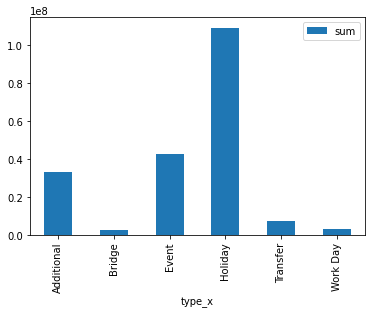

In [43]:
tota = df1.groupby(['type_x'])['sales'].agg(["sum"])
#total_sales2 = total_sales2.sort_index()
tota.plot.bar()
#(x=total_investment.index, y=total_investment.values, 
                        #  ylabel= 'Funding Amount in Dollars',xlabel='Funding Year')
tota

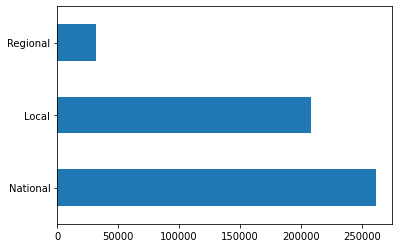

In [47]:
b= df1["locale"].value_counts(sort=True)
b.plot.barh()
plt.show()

In [41]:
missing_values = df1.isnull().sum().sort_values(ascending =True)
missing_values

date            0
type_x          0
locale          0
locale_name     0
description     0
transferred     0
id             68
store_nbr      68
family         68
sales          68
onpromotion    68
city           68
state          68
type_y         68
cluster        68
dtype: int64

In [25]:
stores.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4
